In [34]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [35]:
dados[["Moeda", "Valor_vendas", "Tipo_vendas"]] = dados["Valor"].str.split(expand = True)

In [36]:
dados_vendas = dados[dados["Tipo_vendas"].isna()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,Tipo_vendas
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [37]:
dados_vendas["Valor_vendas_float"] = dados_vendas["Valor_vendas"].str.replace(".","").astype(float)

C:\Users\caiop\AppData\Local\Temp\ipykernel_23028\1132571621.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_vendas_float"] = dados_vendas["Valor_vendas"].str.replace(".","").astype(float)
C:\Users\caiop\AppData\Local\Temp\ipykernel_23028\1132571621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_vendas_float"] = dados_vendas["Valor_vendas"].str.replace(".","").astype(float)


<AxesSubplot:ylabel='Frequency'>

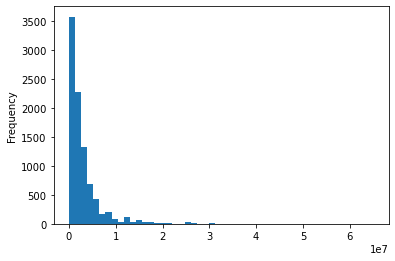

In [38]:
dados_vendas["Valor_vendas_float"].plot.hist(bins = 50)

In [39]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
dados_vendas["Valor_vendas_milhoes"] = dados_vendas['Valor_vendas_float']/1000000

dados_vendas.describe()

C:\Users\caiop\AppData\Local\Temp\ipykernel_23028\2878592431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_vendas_milhoes"] = dados_vendas['Valor_vendas_float']/1000000


,Metragem,Quartos,Banheiros,Vagas,Valor_vendas_float,Valor_vendas_milhoes
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,3.05
std,7856.42,1.05,1.97,2.60,3944208.19,3.94
min,10.00,1.00,1.00,1.00,13000.00,0.01
25%,168.00,3.00,2.00,2.00,890000.00,0.89
50%,276.00,3.00,4.00,4.00,1800000.00,1.80
75%,450.00,4.00,5.00,5.00,3500000.00,3.50
max,750000.00,16.00,40.00,50.00,65000000.00,65.00
